Graph partitioning is the reduction of a graph to a smaller graph by partitioning its set of nodes into mutually exclusive groups. **Spectral graph partitioning** is a technique used to divide a graph into multiple parts or clusters based on its spectral properties

1. Construct adjacency matrix
2. Compute the Laplacian matrix
3. Obtain eigenvectors and eigenvalues
4. Formulate the partitioning problem
5. Apply clustering algorithms
5. Evaluate and refine the partition

In [11]:
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import vq

In [2]:
def construct_similarity_graph(S):

    # Return the weighted adjacency matrix W
    n = S.shape[0]  # Number of data points
    
    # Compute the pairwise Euclidean distances between data points
    distances = np.linalg.norm(S[:, np.newaxis] - S, axis=2)
    
    # Compute the similarity matrix based on Gaussian kernel
    sigma = 1.0  
    W = np.exp(-distances**2 / (2 * sigma**2))
    
    # Set the diagonal elements to zero
    np.fill_diagonal(W, 0)
    
    return W

def compute_unnormalized_laplacian(W):

    # Return the Laplacian matrix L
    D = np.diag(np.sum(W, axis=1))  
    L = D - W  
    
    return L

def compute_generalized_eigenvectors(L, k):

    # Return the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(L)
    indices = np.argsort(eigenvalues)[:k]  
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]
    
    return eigenvalues, eigenvectors


In [3]:
def normalised_spectral_clustering(S,k):
    # Construct the similarity graph (weighted adjacency matrix)
    W = construct_similarity_graph(S)
    
    # Compute the unnormalized Laplacian
    L = compute_unnormalized_laplacian(W)
    
    # Compute the first k generalized eigenvectors
    eigenvalues, eigenvectors = compute_generalized_eigenvectors(L, k)
    
    # Construct the matrix U containing the eigenvectors as columns
    U = eigenvectors[:, :k]
    
    # Create vectors yi corresponding to each row of U
    Y = U / np.linalg.norm(U, axis=1, keepdims=True)
    
    # Cluster the points in Y using k-means algorithm
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    
    # Return the clusters
    clusters = kmeans.labels_
    
    return clusters

In [18]:
def plot_clusters(graph,clusters,color_map):
    # Generate the node positions
    pos = nx.spring_layout(graph)

    # Draw the graph with different node colors based on clusters
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(graph, pos, nodelist=[i], node_color=color_map[cluster], node_size=200)

    # Draw edges and labels
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos)

    # Show the plot
    plt.axis('off')
    plt.show()

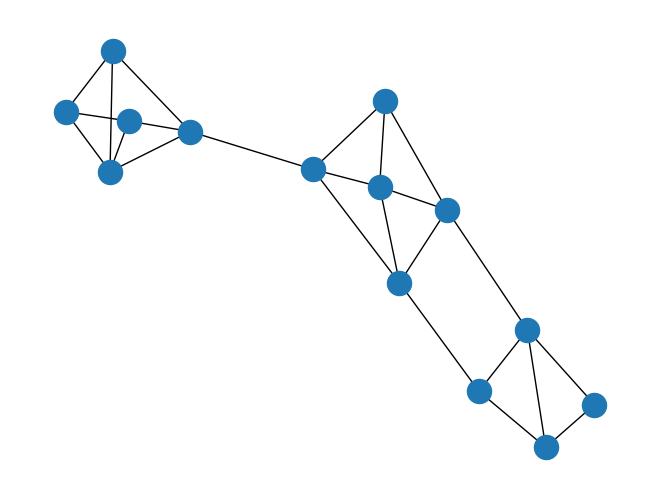

In [12]:
g = nx.Graph()
g.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (1, 3),
    
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8), 
    (8, 4),
    (4, 6),
    (6, 8),
    (5, 7),
    
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 9),
    (9, 11),
    (10, 12),
    (11, 13),
    
    (2, 4),
    (3, 8),
    (5, 9)    
])
nx.draw(g)

In [22]:
adjacency_matrix = nx.adjacency_matrix(g).toarray()

/tmp/ipykernel_13898/3554879984.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(g).toarray()


In [25]:
clusters = normalised_spectral_clustering(adjacency_matrix, 3)
print(clusters)

[2 2 2 2 0 0 0 0 0 1 1 1 1 1]


/home/anuk-k/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


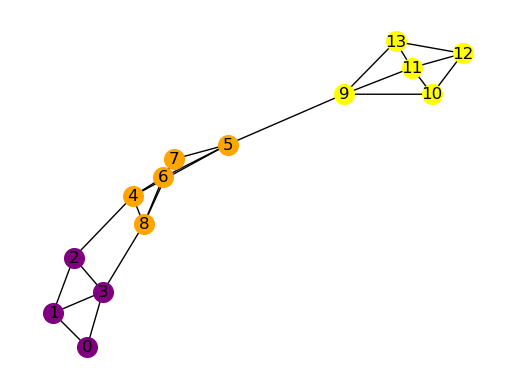

In [35]:
plot_clusters(g,clusters, ['orange', 'yellow', 'purple'])